### Student Information
Name: Kevin Harryyanto (丘騏銘)

Student ID: 108065425

GitHub ID: 13048557 (github.com/kharryyanto)

Kaggle name: Kevin Harryyanto

Kaggle private scoreboard snapshot:

![Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

In [2]:
### Begin Assignment Here

# PART 1: Take Home Exercises from Master Repo

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [6]:
# Answer here
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

cv_tr = CountVectorizer() # training count vectorizer
cv_te = CountVectorizer() # test count vectorizer

tf_tr = cv_tr.fit_transform(train_df['text'])
tf_te = cv_te.fit_transform(test_df['text'])

top30tf_tr = pd.DataFrame(data={'term':cv_tr.get_feature_names(),'frequency':tf_tr.toarray().sum(axis=0)})
top30tf_tr.sort_values(by='frequency', ascending=False, inplace=True)
top30tf_te = pd.DataFrame(data={'term':cv_te.get_feature_names(),'frequency':tf_te.toarray().sum(axis=0)})
top30tf_te.sort_values(by='frequency', ascending=False, inplace=True)

top30tf_tr = top30tf_tr[:30]
top30tf_te = top30tf_te[:30]

g = sns.catplot('term', 'frequency', kind='bar', data=top30tf_tr)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Top 30 words for train dataset')
h = sns.catplot('term', 'frequency', kind='bar', data=top30tf_te)
h.set_xticklabels(rotation=90)
h.fig.suptitle('Top 30 words for test dataset')

Text(0.5, 0.98, 'Top 30 words for test dataset')

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [24]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

tv1000 = TfidfVectorizer(max_features = 1000, tokenizer = nltk.word_tokenize)

tfidf1000 = tv1000.fit_transform(train_df['text'])
print(tv1000.get_feature_names()[100:110])

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']


---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [32]:
# Answer here


# Values on the diagonals represent true values, i.e. cases where the predicted labels equal the true labels.
# On the other hand, values not on the diagonal represent false values, i.e. cases where label predictions are
# off.

# As an example, the cell in row 2 column 1 with value 15 means that there are 15 records which was originally
# labelled as 'anger', but the model falsely labels them as 'fear'.

# Furthermore, the row sum represents the number of records that the model predicts as the appropriate label
# (e.g. the model predicted the 'fear' label in 15+70+9+16 = 110 records). The column sum represent
# the actual number of records that has the appropriate label (e.g. there are 16+70+13+14 = 113 records with
# the 'fear' label originally).


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [33]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(X_train, y_train)

y_train_pred_mnb = mnb.predict(X_train)
y_test_pred_mnb = mnb.predict(X_test)

acc_train_mnb = accuracy_score(y_true=y_train, y_pred=y_train_pred_mnb)
acc_test_mnb = accuracy_score(y_true=y_test, y_pred=y_test_pred_mnb)

print('training accuracy: {}'.format(round(acc_train_mnb, 2)))
print('testing accuracy: {}'.format(round(acc_test_mnb, 2)))

cm_mnb = confusion_matrix(y_true=y_test, y_pred=y_test_pred_mnb) 
print(cm_mnb)

training accuracy: 0.79
testing accuracy: 0.72
[[55 14  5 10]
 [ 6 91  5  8]
 [ 9  7 56  7]
 [ 8 11  8 47]]


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [34]:
# Answer here

print(cm)
print()
print(cm_mnb)
print('---------------------------------------------------------------')
print(classification_report(y_test, y_test_pred))
print()
print(classification_report(y_test, y_test_pred_mnb))

# There are more true predictions for Naive Bayes than Decision Tree (55+91+56+47=249 > 221=55+70+54+42),
# which means that the accuracy for Naive Bayes in this case is higher than Decision Tree.
# If we look further into the classification report, we can also see that the Naive Bayes results have a higher
# precision and recall for all 4 categories. This is due to the lower number of false predictions for Naive Bayes.

[[55 16  9  4]
 [15 70  9 16]
 [ 5 13 54  7]
 [ 9 14  9 42]]

[[55 14  5 10]
 [ 6 91  5  8]
 [ 9  7 56  7]
 [ 8 11  8 47]]
---------------------------------------------------------------
              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.62      0.64      0.63       110
         joy       0.67      0.68      0.68        79
     sadness       0.61      0.57      0.59        74

    accuracy                           0.64       347
   macro avg       0.64      0.64      0.64       347
weighted avg       0.64      0.64      0.64       347


              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       3

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

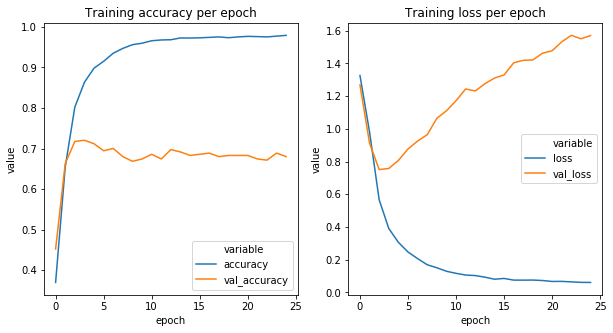

In [36]:
# Answer here

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Training accuracy per epoch')
sns.lineplot(x='epoch', y='value', hue='variable', 
             data=pd.melt(training_log[['epoch','accuracy','val_accuracy']], ['epoch']));

plt.subplot(1,2,2)
plt.title('Training loss per epoch')
sns.lineplot(x='epoch', y='value', hue='variable', 
             data=pd.melt(training_log[['epoch','loss','val_loss']], ['epoch']));

# For the accuracy graph, validation accuract peaks when epoch is about 3. This means that running more epochs would
# only reduce the model's accuracy (overfitting). Epochs less than 3 means that it is underfitting, since it can
# reach a higher accuracy with more epochs.

# Similarly, training loss is the lowest when epoch is about 3. This means that error is lowest in this point.
# Running more epochs will result in a higher loss, signalling overfitting. Running less epochs also result in a
# higher loss, signalling underfitting.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [54]:
# Answer here

# For a given sentence, we can add all the word vectors of the words in the sentence, then divide the result by
# the number of words in the sentence.
# 
# For example: if 'I' = [10,20] and 'eat' = [30,40], then the sentence 'I eat' = [(10+20)/2, (30+40)/2] = [15,35]
# 
# Each sentence will now have their corresponding sentence vector with equal dimensions (number of features), which
# can be "stacked" to turn into an embedding matrix that is used to train a model.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

Finished loading
angry_words:  ['stupid', 'hate', 'annoying', 'weird', 'like', 'confused', 'fucking', 'people', 'dislike', 'awkward', 'reason', 'because', 'scary', 'seriously', 'retarded']

happy_words:  ['birthday', 'thank', 'welcome', 'love', 'miss', 'hello', 'thanks', 'merry', 'bless', 'wish', 'day', 'dear', 'morning', 'good', 'dream']

sad_words:  ['swear', 'feel', 'same', 'wrong', 'meant', 'true', 'reason', 'remember', 'i', 'know', 'bad', 'thought', 'think', 'but', 'shame']

fear_words:  ['anger', 'enemy', 'afraid', 'destroy', 'fears', 'lies', 'faith', 'hatred', 'overcome', 'truth', 'promises', 'enemies', 'minds', 'suffer', 'thoughts']

color list:
Angry: Red
Happy: Yellow
Sad: Blue
Fear: Green


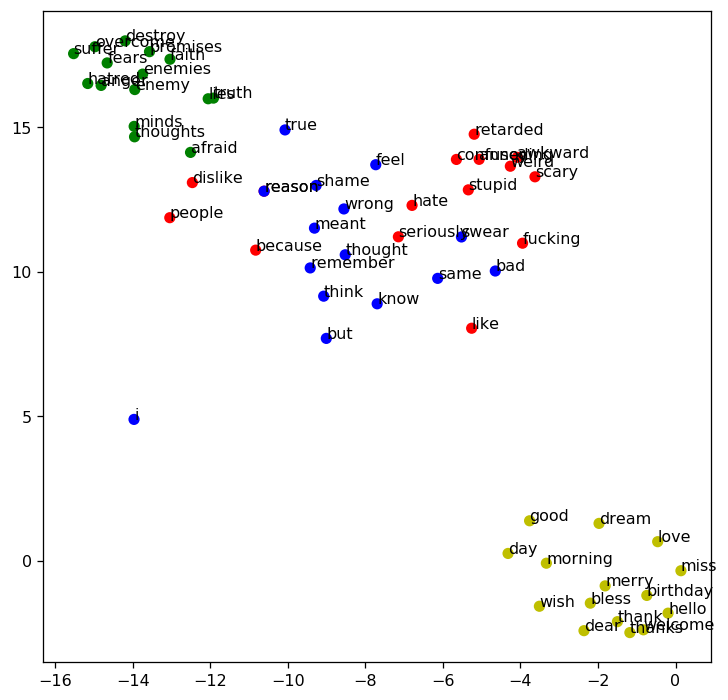

In [41]:
# Answer here

# IMPORTANT NOTE: PC hangs up when loading Google news embedding model, so we will use glove-twitter-25 instead

import gensim.downloader as api

model = api.load("glove-twitter-25")
print('Finished loading')

word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = [word_ for word_, sim_ in model.most_similar('angry', topn=topn)]
happy_words = [word_ for word_, sim_ in model.most_similar('happy', topn=topn)]        
sad_words = [word_ for word_, sim_ in model.most_similar('sad', topn=topn)]        
fear_words = [word_ for word_, sim_ in model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('\nhappy_words: ', happy_words)
print('\nsad_words: ', sad_words)
print('\nfear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words

print('\ncolor list:')
cn = topn
color = ['r'] * cn + ['y'] * cn + ['b'] * cn + ['g'] * cn
print('Angry: Red\nHappy: Yellow\nSad: Blue\nFear: Green')

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

tsne = TSNE(n_components=2, metric='cosine', random_state=28)

X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# PART 2: Kaggle Competition (Results on top of notebook)

# PART 3: Report on Kaggle Competition

## Preprocessing

I first loaded the JSON data and normalized it, before adding additional details from `data_identification.csv` and `emotion.csv` using SQL-style join. The resulting dataframe is then adjusted (column renaming and reordering, fixing data types). The text data is also preprocessed and stored as a new column containing clean, tokenized text. A separate column is also created to store the clean text in string format.

In [ ]:
import json
from ast import literal_eval

import gensim
import re
import nltk
import string


with open('tweets_DM.json') as master_json:
    master = [json.loads(x) for x in master_json.readlines()]
    
df = pd.io.json.json_normalize(master) # Normalize JSON data

df.rename(columns={'_crawldate':'crawldate','_index':'index','_score':'score','_source.tweet.hashtags':'hashtags'
                  ,'_source.tweet.text':'text','_source.tweet.tweet_id':'tweet_id','_type':'type'}, inplace=True)

data_id_df = pd.read_csv('data_identification.csv')
emotion_df = pd.read_csv('emotion.csv')

temp_df = data_id_df.merge(emotion_df, how='outer', on='tweet_id') # Join data identification with emotion labels
df = df.merge(temp_df, how='left', on='tweet_id') # Join with main dataframe

df = df[['tweet_id','identification','score','index','crawldate','type','hashtags','text', 'emotion']]

df['crawldate'] = pd.to_datetime(df['crawldate']) # Convert to datetime
df['hashtags'] = df['hashtags'].apply(lambda x: literal_eval(x)) # Convert to list

def preprocess_tweet(tweet):
    # convert string into unicode
    text = gensim.utils.any2unicode(tweet)
    # remove URL's
    text = re.sub(r'https?://[^ ]+', '', text)
    text = re.sub(r'www.[^ ]+', '', text)
    # remove hashtags
    text = re.sub('#', ' ', text)
    # remove duplicate whitespaces
    text = re.sub(r'\s+', ' ', text)
    # initialize lemmatizer and tokenizer
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokenizer = nltk.tokenize.casual.TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    # lemmatize and tokenize words
    text = [lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)]
    # remove individual punctuation (but not emoticons)
    return [word for word in text if word not in set(string.punctuation)]

df['clean_text'] = df['text'].progress_apply(lambda x: preprocess_tweet(x)) # Tokenized clean text
df['clean_sent'] = df['clean_text'].apply(lambda x: ' '.join(x)) # Clean text in string format

## Initial EDA

I first looked into how score, index, crawl date-time, type and number of hashtags in a tweet (non-text attributes) would relate to the emotions.
<br>
<br>
However, all the records have "hashtag_tweets" as index and "tweets" as type, so we omit these two columns.
<br>
<br>
Using EDA, I discovered that score, crawl date-time and number of hashtags did not provide an insight to the distribution of the emotion labels, so I abandoned them all and rely only on text data.

### Score vs. Emotion

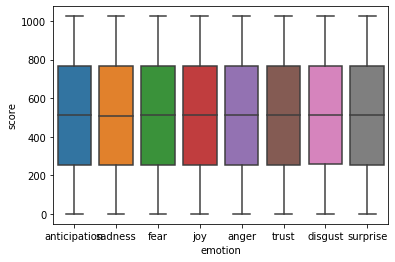

In [10]:
sns.boxplot(x='emotion',y='score',data=df[df['identification']=='train'])

### Crawl Date vs. Emotion

C:\Users\Kevin\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


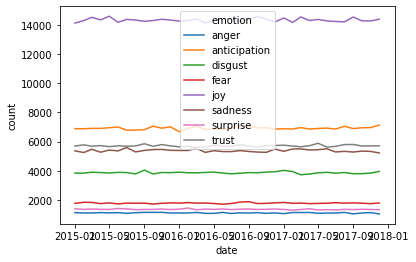

In [12]:
sns.lineplot(x='date', y='count', hue='emotion', data=date2emo)

### Crawl Month vs. Emotion

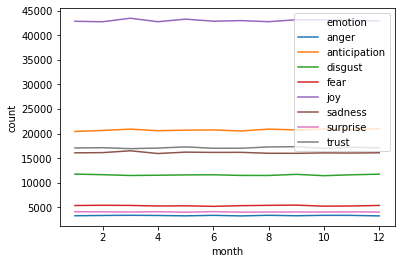

In [14]:
sns.lineplot(x='month', y='count', hue='emotion', data=date2emo2)

### Crawl Day vs. Emotion

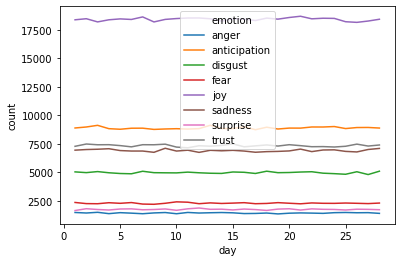

In [16]:
sns.lineplot(x='day', y='count', hue='emotion', data=date2emo3)

### Crawl Hour vs. Emotion

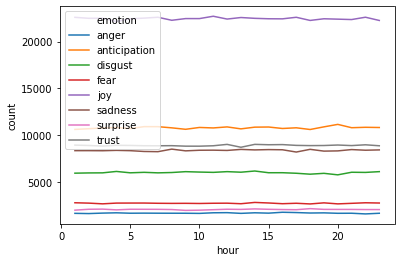

In [18]:
sns.lineplot(x='hour', y='count', hue='emotion', data=date2emo4)

### No. of hashtags in a tweet vs. Emotion

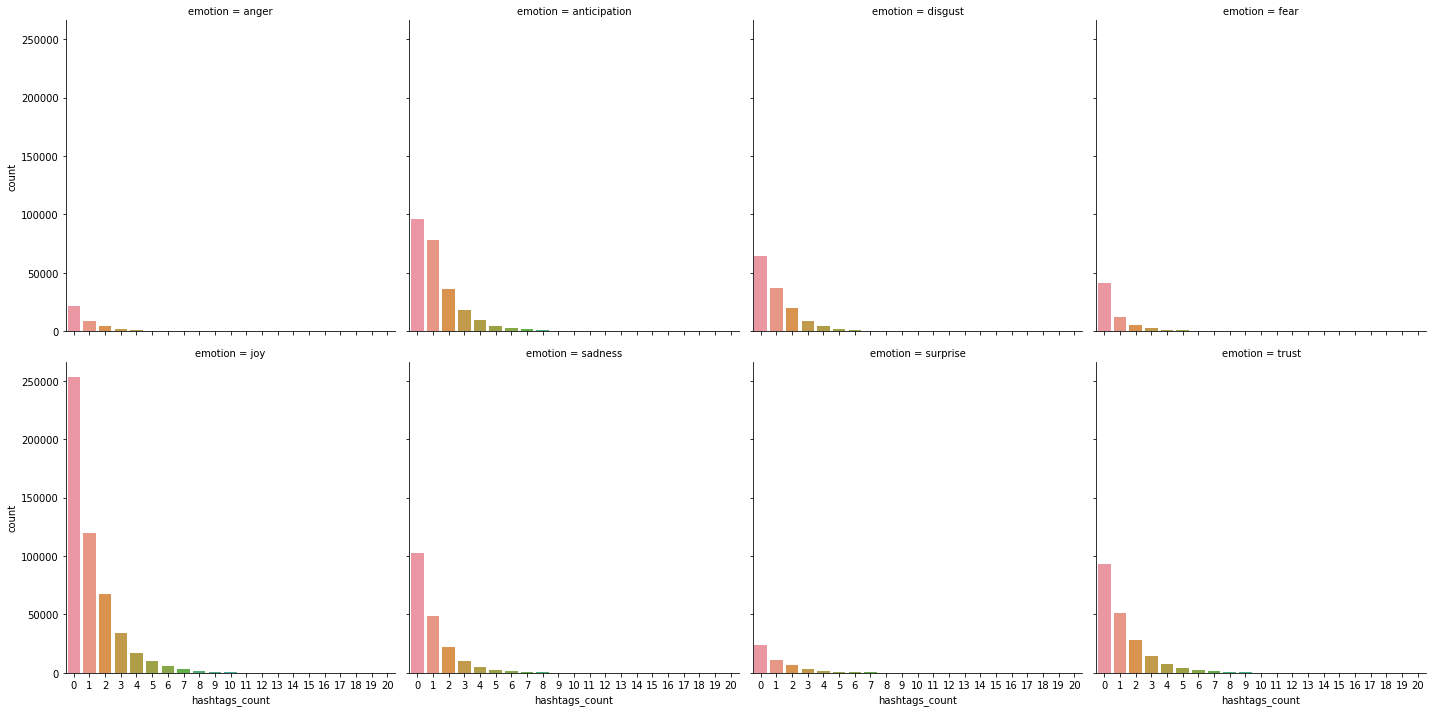

In [20]:
sns.catplot('hashtags_count','count',col='emotion',data=ht2emo,kind='bar',col_wrap=4)

## Further Preprocessing

The next steps for preprocessing are as follows:
- Convert tokenized text into sequences
- Split data into training, validation and test data
- Convert output labels into one-hot-encoded labels
- Load GloVe text file and create embedding matrix

In [ ]:
df.drop(columns=['index','type', 'score', 'crawldate'], inplace=True) # Remove unused columns

MAXLEN = max(df['clean_text'].apply(lambda d: len(d))) # Maximum length of token sequences = 110

# Convert tokenized text into sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(split=' ')
tokenizer.fit_on_texts(df['clean_sent'])
df['clean_tokseq'] = tokenizer.texts_to_sequences(df['clean_sent'])
df['clean_tokseq'] = list(pad_sequences(df['clean_tokseq'], maxlen = MAXLEN+10, padding='post'))

VOCABSIZE = max([max(sublist) for sublist in df['clean_tokseq'].values])+1 # Number of unique tokens = 528620

# Split data into training, validation and test data
train_df = df[df['identification']=='train'].drop(columns='identification')
test_df = df[df['identification']=='test'].drop(columns=['identification','emotion'])

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_df.drop('emotion', axis=1), train_df['emotion'], random_state=1)

# Convert output labels into one-hot encoded labels
import keras
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_val)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_val = label_encode(label_encoder, y_val)

# Load GloVe model
glove_dir = 'glove.twitter.27B.200d.txt' # GloVe model for Twitter, 200 dimensions
embeddings_index = {}
f = open(glove_dir)

for line in f:
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

# Create GloVe embedding matrix
embedding_dim = 200
embedding_matrix = np.zeros((VOCABSIZE, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < VOCABSIZE:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

## Model Building

I used a simple Bidirectional LSTM model with GloVe Twitter embedding for training and prediction. Details of the model can be seen in the code below.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Bidirectional, LSTM, GlobalMaxPool1D

output_shape = len(label_encoder.classes_)

model = Sequential()
model.add(Embedding(VOCABSIZE, embedding_dim, weights=[embedding_matrix], input_length = MAXLEN+10))
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(output_shape, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

batch_size = 512
model.fit(np.stack(x_train['clean_tokseq'].to_numpy(), axis=0), y_train, epochs = 4,
          batch_size=batch_size, 
          validation_data = (np.stack(x_val['clean_tokseq'].to_numpy(),axis=0), y_val),
          verbose = 1)

## Prediction and Output

The code below uses the model to predict the test data and decode the one-hot-encoding into the original labels. The results are then output as CSV.

In [ ]:
test_df['Res'] = label_decode(label_encoder, new_model.predict(np.stack(test_df['clean_tokseq'].to_numpy(),axis=0)))

out_Res = test_df[['tweet_id','Res']]
out_Res.columns = ['id','emotion']
finalname = 'GloVe-BiLSTM.csv'
out_Res.to_csv(finalname, index=False)

## Other things tried

The following are the models that I have tried and uploaded to the original Kaggle competition. The private scores are also listed.
- TFIDF features, Naive Bayes (initial version): 0.343
- TFIDF features, DNN (multiple Dense layers): 0.386
- Word2Vec features with Random Forest: 0.416
- CNN with default Keras embedding layer: 0.451
- BiLSTM-CNN with default Keras embedding layer: 0.455
- CNN-BiLSTM with default Keras embedding layer: 0.458
- BoW features, DNN (multiple Dense layers): 0.461
- LSTM with default Keras embedding layer: 0.461
- BiLSTM with default Keras embedding layer: 0.462
- 2 layer CNN with GloVe Twitter 200: 0.471
- TFIDF features, DNN (multiple Dense layers), hyperparameter tweaking: 0.471
- BiLSTM with GloVe Twitter 200 and custom Attention layer: 0.483
- BiLSTM with GloVe Twitter 200: 0.486